## **GET DATASET**

In [34]:
# Example Simple Dataset
!wget https://download854.mediafire.com/qvwj5w1tvdigrMcGEs983q4duXOvf26MjmQd9p07ujy0cgQ_beL9FMaEhzT9OoXOFchE0si7GwfttAZUxHqNVBryCKXpTsSu3hHQLO8-Oyh8sC9MY1GVuEkQKZ7RAYh01FN5gL-Jl3SU4g_TJsJWRBKdfRjBOPpPXtPR1gpj49U/e7mvrqmadgjoagm/motivasi.xlsx

--2023-10-19 06:40:42--  https://download854.mediafire.com/qvwj5w1tvdigrMcGEs983q4duXOvf26MjmQd9p07ujy0cgQ_beL9FMaEhzT9OoXOFchE0si7GwfttAZUxHqNVBryCKXpTsSu3hHQLO8-Oyh8sC9MY1GVuEkQKZ7RAYh01FN5gL-Jl3SU4g_TJsJWRBKdfRjBOPpPXtPR1gpj49U/e7mvrqmadgjoagm/motivasi.xlsx
Resolving download854.mediafire.com (download854.mediafire.com)... 205.196.121.49
Connecting to download854.mediafire.com (download854.mediafire.com)|205.196.121.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10173 (9.9K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘motivasi.xlsx’

motivasi.xlsx       100%[===================>]   9.93K  --.-KB/s    in 0s      

2023-10-19 06:40:43 (163 MB/s) - ‘motivasi.xlsx’ saved [10173/10173]



In [1]:
# UCI Bike Dataset
!wget https://archive.ics.uci.edu/static/public/1/abalone.zip

--2023-10-19 06:25:18--  https://archive.ics.uci.edu/static/public/1/abalone.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘abalone.zip’

abalone.zip             [ <=>                ]  54.06K  --.-KB/s    in 0.1s    

2023-10-19 06:25:18 (432 KB/s) - ‘abalone.zip’ saved [55357]



In [2]:
# Unzip UCI Bike Dataset
!unzip abalone.zip

Archive:  abalone.zip
  inflating: Index                   
  inflating: abalone.data            
  inflating: abalone.names           


## **PREPARING REQUIREMENTS**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
# import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D

In [46]:
# df = pd.read_excel("motivasi.xlsx")
cols = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'vischera_weight', 'shell_weight', 'rings']
df = pd.read_csv("abalone.data", names=cols).drop(columns=['sex'])
# df['schoolsup'] = df['schoolsup'].map({'yes': 1, 'no': 0})
df.head()

,length,diameter,height,whole_weight,shucked_weight,vischera_weight,shell_weight,rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


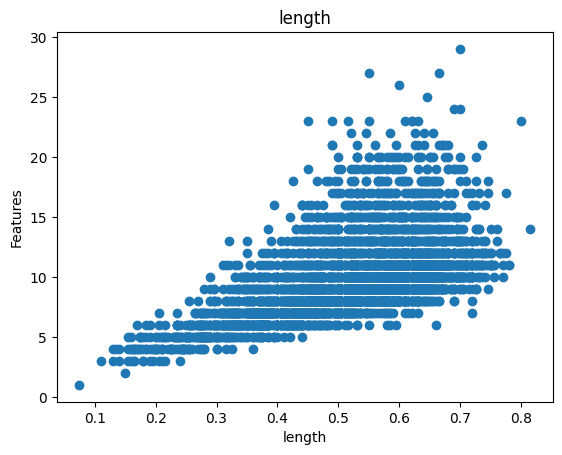

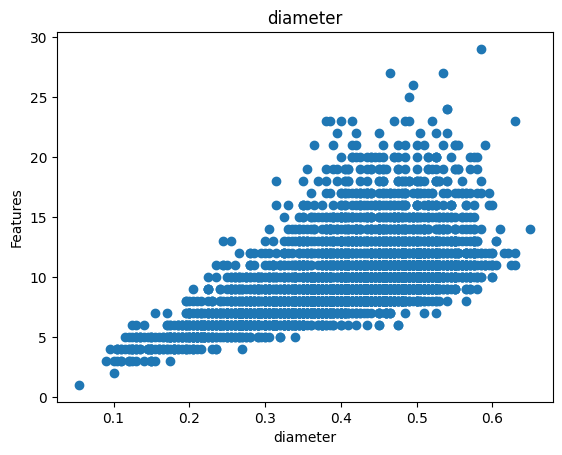

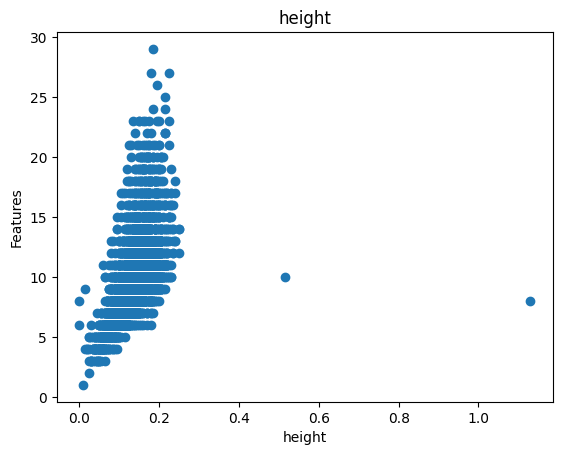

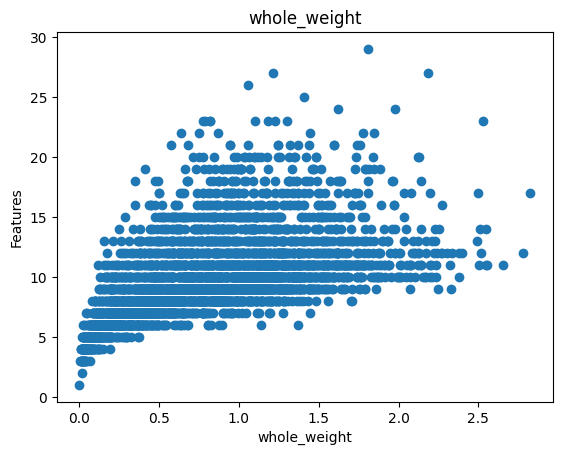

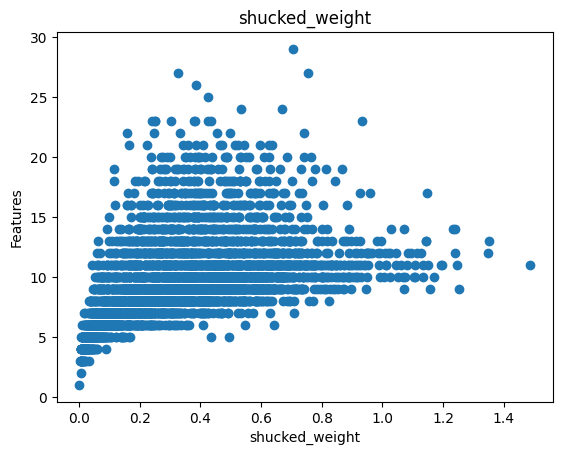

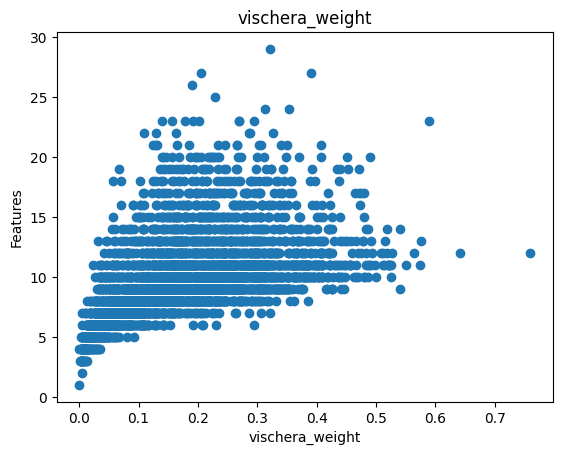

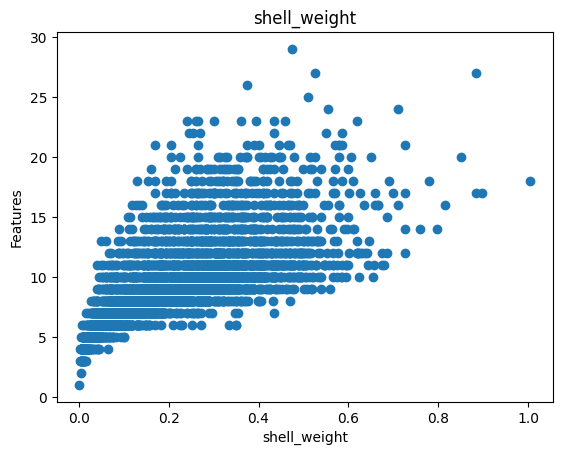

In [47]:
# Plotting each features
for label in df.columns[:-1]:
  plt.scatter(df[label], df["rings"])
  plt.title(label)
  plt.ylabel("Features")
  plt.xlabel(label)
  plt.show()

## **PREPARING DATASET FOR TRAINING**

In [48]:
# 60% training data (random), 20% validation data, and 20% testing data
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

# 60% training data (non-random), 20% validation data, and 20% testing data
# total_len = len(df)
# idx_train_end = int(0.6 * total_len)
# idx_val_end = int(0.8 * total_len)
# train = df[:idx_train_end]
# val = df[idx_train_end:idx_val_end]
# test = df[idx_val_end:]

# 100% training data
# train = df.copy()

In [49]:
# Function to split data into features and target
def get_xy(dataframe, y_label, x_labels=None):
    # Make a deep copy of the dataframe
    dataframe = copy.deepcopy(dataframe)

    # If x_labels are not provided (None), use all columns as features
    if x_labels is None:
        X = dataframe[[c for c in dataframe.columns if c != y_label]].values
    else:
        # If x_labels are provided
        if len(x_labels) == 1:
            # If only one x column is given, reshape it to the appropriate form
            X = dataframe[x_labels[0]].values.reshape(-1, 1)
        else:
            # If more than one x column is given, use all of them
            X = dataframe[x_labels].values

    # Get the target values (y) and reshape it into a 2D array
    y = dataframe[y_label].values.reshape(-1, 1)

    # Concatenate features (X) and target (y) into a single array
    data = np.hstack((X, y))

    # Return the data, features (X), and target (y)
    return data, X, y

## **TRAINING DATASET (SIMPLE LINEAR REGRESSION)**

In [40]:
_, X_train_x1, y_train_x1 = get_xy(train, "y", x_labels=[['x1']])
# _, X_val_x1, y_val_x1 = get_xy(val, "y", x_labels=[['x1']])
# _, X_test_x1, y_test_x1 = get_xy(test, "y", x_labels=[['x1']])

In [41]:
# Create a linear regression model object
x1_reg = LinearRegression()

# Fit the model with training data
x1_reg.fit(X_train_x1, y_train_x1)

LinearRegression()

### **TESING AND SCORE**

In [42]:
print("Intercept = ", x1_reg.intercept_)
print("Coeficient = ", x1_reg.coef_)

Intercept =  [45.68654924]
Coeficient =  [[0.50707232]]


In [43]:
print("R-Square = ", x1_reg.score(X_train_x1, y_train_x1))
print("RMSE = ", np.sqrt(mean_squared_error(y_train_x1, x1_reg.predict(X_train_x1))))

R-Square =  0.31459180950202326
RMSE =  6.4792940717335155


In [44]:
# Randomly select a row from the DataFrame
df_random_row = df.sample(n=1)

# Specify the name of the feature column to be used
x_column_name = 'x1'  # Replace with the appropriate column name

# Retrieve the values of x and y
x_value = df_random_row[x_column_name].values[0]
y_value = df_random_row['y'].values[0]

# Calculate the prediction using the linear regression model
# predicted_y = temp_reg.predict(np.array([[x_value]]))[0]
predicted_y = x1_reg.intercept_ + x1_reg.coef_ * x_value

# Calculate the residual
residual = abs(predicted_y - y_value)

# Print the results
print("X = ", x_value)
print("Actual Y = ", y_value)
print("Predicted Y = ", predicted_y)
print("Residual = ", residual)

X =  75
Actual Y =  80
Predicted Y =  [[83.71697358]]
Residual =  [[3.71697358]]


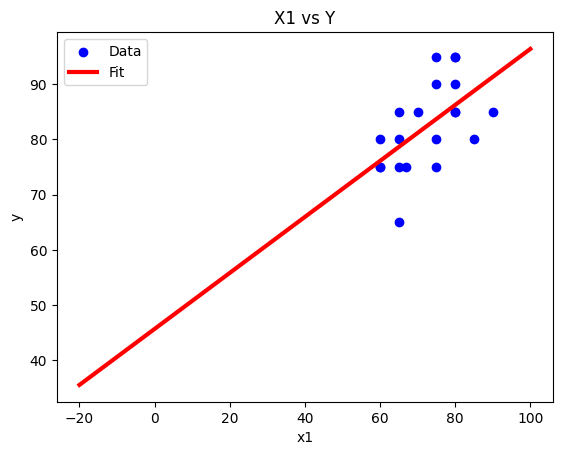

In [45]:
# Plotting relationship between x1 and y
plt.scatter(X_train_x1, y_train_x1, label="Data", color="blue")
x = tf.linspace(-20, 100, 100)
plt.plot(x, x1_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("X1 vs Y")
plt.ylabel("y")
plt.xlabel("x1")
plt.show()

## **TRAINING DATASET (MULTIPLE LINEAR REGRESSION)**

In [50]:
_, X_train_all, y_train_all = get_xy(train, "rings", x_labels=df.columns[:-1])
_, X_val_all, y_val_all = get_xy(val, "rings", x_labels=df.columns[:-1])
_, X_test_all, y_test_all = get_xy(test, "rings", x_labels=df.columns[:-1])

In [51]:
# Create a linear regression model object
all_reg = LinearRegression()

# Fit the model with training data
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

### **TESTING AND SCORE**

In [52]:
print("Intercept = ", all_reg.intercept_)
print("Coeficient = ", all_reg.coef_)

Intercept =  [3.28829568]
Coeficient =  [[ -2.87368573  15.19674009   7.58330559   7.80348865 -18.12205034
   -8.92796125  10.46239529]]


In [53]:
print("R-Square = ", all_reg.score(X_train_all, y_train_all))
print("RMSE = ", np.sqrt(mean_squared_error(y_train_all, all_reg.predict(X_train_all))))

R-Square =  0.5273068752575694
RMSE =  2.175190571323334


In [54]:
# Sample a random row from the DataFrame
df_random_row = df.sample(n=1)

# Extract 'x1' and 'x2' values
x_values = df_random_row[['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'vischera_weight', 'shell_weight']].values[0]

# Retrieve the actual value from the 'y' column
y_value = df_random_row['rings'].values[0]

# Calculate the prediction using the multi-linear regression model
predicted_y = all_reg.intercept_ + np.sum(all_reg.coef_ * x_values)

# Calculate the residual
residual = abs(predicted_y - y_value)

# Print the results
print("X values = ", x_values)
print("Actual Y = ", y_value)
print("Predicted Y = ", predicted_y)
print("Residual = ", residual)

X values =  [0.6    0.465  0.155  1.262  0.6245 0.2455 0.33  ]
Actual Y =  10
Predicted Y =  [9.59753895]
Residual =  [0.40246105]


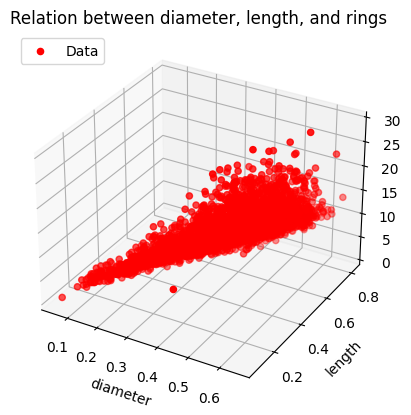

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting x1, x2, and y
ax.scatter(df['diameter'], df['length'], df['rings'], c='r', marker='o', label='Data')

# Including label axis
ax.set_xlabel('diameter')
ax.set_ylabel('length')
ax.set_zlabel('rings')

# Showing plot
plt.title('Relation between diameter, length, and rings')
plt.legend(loc='upper left')
plt.show()

In [56]:
# Creating 3D interactive ploy
fig = go.Figure(data=[go.Scatter3d(x=df['diameter'], y=df['length'], z=df['rings'], mode='markers', marker=dict(size=4, color='red', opacity=0.8))])

# Adding axis label
fig.update_layout(scene=dict(xaxis_title='Diameter', yaxis_title='Length', zaxis_title='Rings'))

# Creating title
fig.update_layout(title='Relation between Diameter, Length, and Rings')
fig.show()